## BUSINESS UNDERSTANDING
You can’t build a profitable future on a revolving door of customers, yet this is the reality facing many telecommunications companies like SyriaTel. Every month, a significant segment of the subscriber base decides to cease service, walking away with their future revenue and inflating the company’s costs.

SyriaTel operates in a highly competitive and saturated market where customer loyalty is fragile, and the cost of acquiring a new customer is exponentially higher (often 5 to 10 times) than the cost of retaining an existing one. A steady stream of customer churn erodes profit margins and severely limits the Customer Lifetime Value.

The data reveals that churn is not random; it is driven by predictable friction points and indicators:

Service Quality Fatigue: High volumes of customer service calls or frequent technical issues signal deep dissatisfaction, driving customers to seek more reliable providers.

Pricing & Value: Customers who utilize high-cost features (like the international plan) but perceive their total bill as poor value are prime candidates for defection.

Neglect: Customers who have been with the company for a short or long tenure but have never been checked on or proactively offered better deals feel unvalued and are susceptible to competitors’ offers.

The consequences of unmanaged churn are devastating:

Massive Revenue Loss: The immediate loss of subscription fees and future service upgrades from the churned customer.

Wasted Marketing Spend: Constant diversion of marketing budgets to expensive customer acquisition efforts instead of more profitable retention programs.

Operational Strain: Increased strain on customer service departments handling churn requests and account closures, preventing them from focusing on service issues.

The guiding question becomes: Can we predict which customers are highly likely to churn soon, allowing us to intervene with targeted offers and service improvements before they defect?

This project is more than a technical exercise. It is about shifting the narrative from losing customers to building long-term loyalty. If successful, predictive modeling can turn reactive cancellations into proactive service management, ensuring SyriaTel's profitability for years to come.







## PROBLEM STATEMENT

SyriaTel incurs significant financial losses annually due to high customer churn, estimated to be costing the company millions in lost subscription revenue and inflated customer acquisition costs. Current efforts to reduce churn are often untargeted (sending mass discounts) or reactive (only contacting customers once they initiate the cancellation process). This approach is inefficient and fails to address the underlying drivers of dissatisfaction before the point of no return.

The challenge is to develop a robust binary classification model that accurately predicts the probability of a customer churning. By identifying at-risk customers in advance, the Marketing and Retention departments can execute precise, personalized, and timely interventions (e.g., service improvements, loyalty bonuses, pricing adjustments) that effectively save the customer, thereby maximizing Customer Lifetime Value (CLV) and protecting the company's long-term profitability.

This problem is fundamentally a binary classification task where the goal is to use historical customer data (e.g., usage patterns, call volume, plan details, and billing information) to predict the status: Will Churn (1) or Will Stay (0).


## OBJECTIVES
## Main Objective

To develop a high-performance, validated machine learning model that accurately predicts customer churn for SyriaTel, enabling proactive, data-informed retention strategies that protect revenue and improve Customer Lifetime Value (CLV).

## Specific Objective

1.Identify Key Churn Drivers

2.Model Benchmarking

3.Optimize Performance Metric

4.Actionable Threshold Determination

5.Provide Scalable Recommendations





## STAKEHOLDERS

1. Chief Marketing Officer and Retention Team
2. Chief Financial Officer
3. Customer Service Department Head
4. Product and Service Department Team 

## DATA UNDERSTANDING

The dataset used in this analysis is the SyriaTel Customer Churn dataset sourced from Kaggle

The dataset contains 3,333 customer records with no missing values, indicating excellent data integrity, which simplifies the initial data cleaning process. The features cover four main areas critical to a telecom business: Usage, Cost, Service Engagement, and Features/Geography.

##### Dataset Overview
##### Import The necessary libraries


In [5]:
# Data Manipulation and Numerical Operations
import pandas as pd
import numpy as np

# Visualization Libraries for EDA and Results
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Preprocessing and Feature Engineering
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # For handling potential missing values if the data was messy

# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Metrics and Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    precision_recall_curve
)

# Handling Class Imbalance 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline


In [7]:
# load dataset
df = pd.read_csv('Data/Telecom-Churn-Data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
# lets look at the column names 
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [11]:

# Define the function to clean column names
def clean_column_names(df):
    """Converts column names to lowercase and replaces spaces with underscores."""
    new_columns = []
    for col in df.columns:
        # Convert to lowercase, replace spaces with underscores, and strip leading/trailing whitespace
        clean_col = col.strip().lower().replace(' ', '_')
        new_columns.append(clean_col)
    df.columns = new_columns
    return df

# Apply the function to the DataFrame
df = clean_column_names(df)

# Print the list of new column names
print(df.columns.tolist())

['state', 'account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn']


In [12]:
df.tail()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


Observation:

After eliminating the whitespaces in the column names and replacing it with underscores the names were now well structured with no typos and also no random casing issues.

Now we will move on to metadata which will help us understand the overall quality and structure of the dataset.

In [13]:
# get metadata info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [8]:
print('This Dataset has '+ str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns.')

This Dataset has 3333 rows and 21 columns.


In [9]:
print('Data types for each column:')
print(df.dtypes)

Data types for each column:
state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [14]:
# check unique values
print('Unique values in each column:')
print(df.nunique())

Unique values in each column:
state                       51
account_length             212
area_code                    3
phone_number              3333
international_plan           2
voice_mail_plan              2
number_vmail_messages       46
total_day_minutes         1667
total_day_calls            119
total_day_charge          1667
total_eve_minutes         1611
total_eve_calls            123
total_eve_charge          1440
total_night_minutes       1591
total_night_calls          120
total_night_charge         933
total_intl_minutes         162
total_intl_calls            21
total_intl_charge          162
customer_service_calls      10
churn                        2
dtype: int64


Observation
The SyriaTel dataset contains a rich mix of features, categorized by their cardinality relative to the total number of records (N = 3333), which guides the necessary preprocessing steps.

High-Cardinality Features: Several columns have a very high number of unique values, effectively treating them as continuous or identifiers. phone_number is perfectly unique (3333), confirming it is a unique identifier that must be dropped as it provides no general predictive value. Usage metrics like total_day_minutes (1667), total_day_charge (1667), total_eve_minutes (1611), and total_night_minutes (1591) are highly granular and will be treated as numerical, requiring standard scaling. The high redundancy between minutes and charge columns is again evident in their matching unique counts, reinforcing the prior decision to drop the charge columns.

Moderate-Cardinality Features: account_length (212) and state (51) are moderate-to-high cardinality. account_length is suitable for scaling. state, despite being categorical, has 51 values, which is too many for straightforward one-hot encoding and will require specialized handling such as target encoding or grouping based on regional churn rates.

Low-Cardinality Features: Features with low unique counts are ideal for direct encoding or interpretation as ordinal variables. area_code (3), international_plan (2), and voice_mail_plan (2) are perfectly suited for one-hot encoding. customer_service_calls (10) is a crucial low-cardinality ordinal feature that can be analyzed directly or binned, while total_intl_calls (21) is also manageable.

Target Variable: The target variable, churn, has 2 unique values, confirming the dataset is set up for a binary classification problem. Overall, the dataset provides a strong foundation for modeling, but careful preprocessing must be applied to manage the high-cardinality state feature and the unique identifier phone_number.


In [18]:
# get numerical columns
numerical_cols = df.select_dtypes(include='number').columns.tolist()
print('Numerical columns:', numerical_cols)

Numerical columns: ['account_length', 'area_code', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']


In [22]:
# descriptive statistics for numerical columns
df[numerical_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area_code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number_vmail_messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total_day_minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total_day_calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total_day_charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total_eve_minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total_eve_calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total_eve_charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total_night_minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


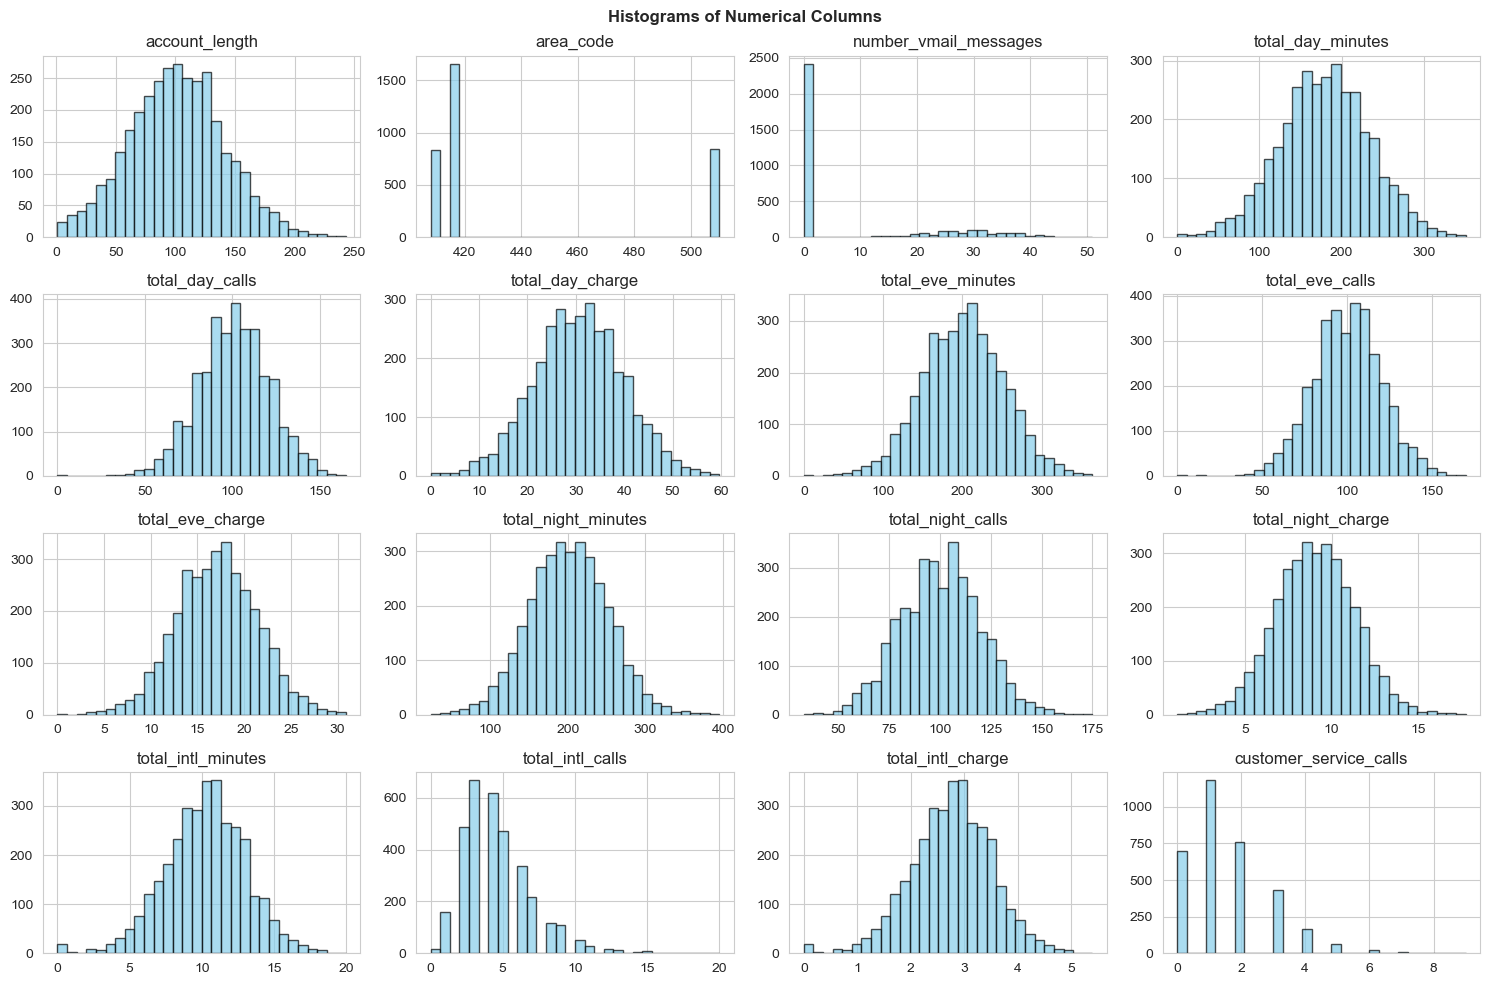

In [24]:
# visualization for numerical columns
df[numerical_cols].hist(
    figsize=(15, 10),
    bins=30,
    edgecolor='black',
    color ='skyblue',
    alpha=0.7
)

plt.suptitle('Histograms of Numerical Columns', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

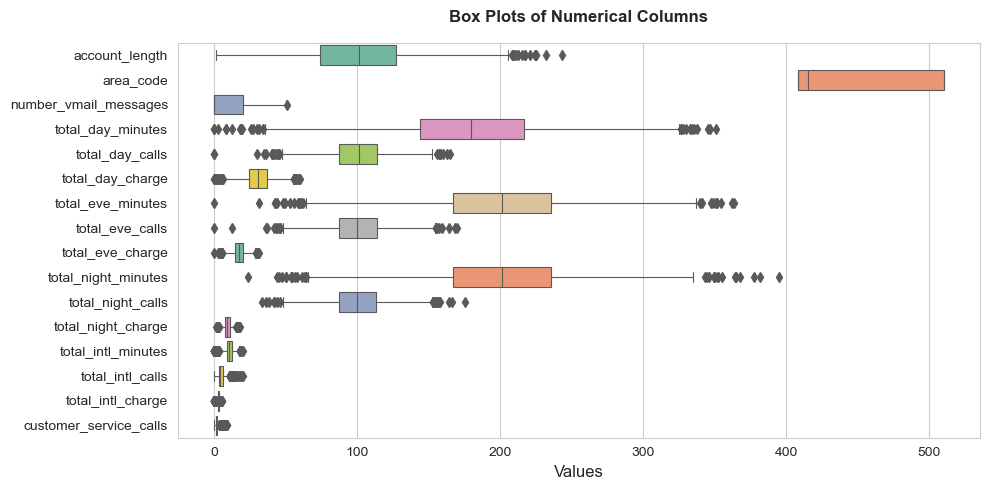

In [26]:
# box plots for numerical columns
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df[numerical_cols],
    orient='h',
    palette='Set2',
    linewidth = 0.8
)

plt.title('Box Plots of Numerical Columns', fontsize=12, fontweight='bold', pad=15)
plt.xlabel('Values', fontsize=12)
plt.tight_layout()
plt.show()
